In [61]:
from sklearn.datasets import load_diabetes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
X,y =load_diabetes(return_X_y=True)

In [63]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler , QuantileTransformer
from sklearn.pipeline import Pipeline

In [65]:
# lg = KNeighborsClassifier()
# # lg = LinearRegression()
# lg.fit(X,y)
# new = lg.predict(X)

pipe = Pipeline([
    ('scaling',StandardScaler()),
    # ('model',LinearRegression())
    ('model',KNeighborsRegressor(n_neighbors=2))
])

pipe.fit(X,y)
new = pipe.predict(X)


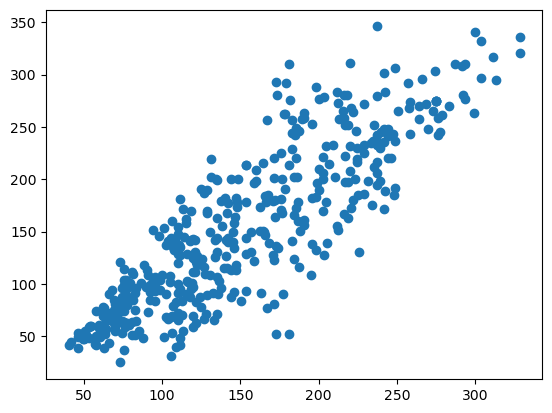

In [66]:
plt.scatter(new,y)

In [67]:
from sklearn.model_selection import GridSearchCV

# pipe.get_params() to get model__n_jobs 
newModel = GridSearchCV(estimator=pipe , param_grid={'model__n_jobs':[1,2,3,4,5,6,7,8,9,10]},cv=3)

newModel.fit(X,y)
pd.DataFrame(newModel.cv_results_) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001571,2.603586e-04,0.002163,0.000820,1,{'model__n_jobs': 1},0.268889,0.339379,0.264563,0.290944,0.034295,1
1,0.001532,7.316719e-05,0.013917,0.000123,2,{'model__n_jobs': 2},0.268889,0.339379,0.264563,0.290944,0.034295,1
2,0.001494,4.072714e-04,0.014088,0.000398,3,{'model__n_jobs': 3},0.268889,0.339379,0.264563,0.290944,0.034295,1
3,0.001767,3.298699e-04,0.014688,0.000577,4,{'model__n_jobs': 4},0.268889,0.339379,0.264563,0.290944,0.034295,1
4,0.001752,3.563459e-04,0.014781,0.000721,5,{'model__n_jobs': 5},0.268889,0.339379,0.264563,0.290944,0.034295,1
5,0.000999,1.946680e-07,0.015538,0.000244,6,{'model__n_jobs': 6},0.268889,0.339379,0.264563,0.290944,0.034295,1
6,0.001508,4.118744e-04,0.014865,0.000229,7,{'model__n_jobs': 7},0.268889,0.339379,0.264563,0.290944,0.034295,1
7,0.001498,4.041667e-04,0.015186,0.000678,8,{'model__n_jobs': 8},0.268889,0.339379,0.264563,0.290944,0.034295,1
8,0.001004,5.002373e-06,0.015983,0.000107,9,{'model__n_jobs': 9},0.268889,0.339379,0.264563,0.290944,0.034295,1
9,0.001383,5.323353e-04,0.015741,0.000603,10,{'model__n_jobs': 10},0.268889,0.339379,0.264563,0.290944,0.034295,1


In [68]:
from sklearn.model_selection import train_test_split



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linearModel = LinearRegression()

linearModel.fit(X_train,y_train)
y_pred = linearModel.predict(X_test)



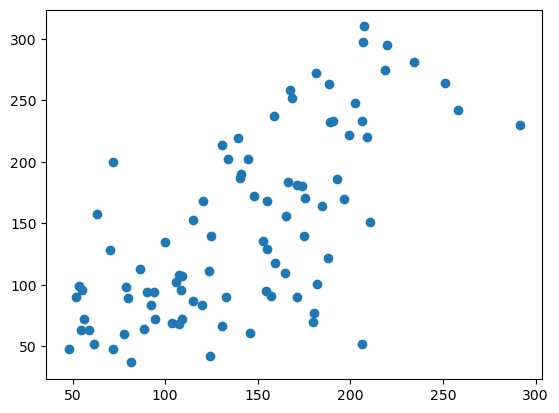

In [69]:
plt.scatter(y_pred,y_test)

In [70]:
df = pd.read_csv(r'..\data\creditcard.csv')[:80000]

df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [71]:
X = df.drop(columns=['Time','Amount','Class']).values
y = df['Class'].values
f'Number of fraud cases {y.sum()} out of {y.shape[0]} cases'

'Number of fraud cases 196 out of 80000 cases'

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=23)

mod = LogisticRegression(class_weight={0:1,1:2})

mod.fit(X_train,y_train)

f'the model predicted {mod.predict(X_test).sum()} out of {y_test.sum()} , the score is {mod.score(X_test,y_test)}'

'the model predicted 55 out of 57 , the score is 0.9988'

In [73]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=LogisticRegression() ,
    param_grid={'class_weight' : [{0:1 ,1:v} for v in range(1,5)]} ,
    cv=5 ,
    n_jobs=-1
)
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4}]})

In [74]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.486964,0.071416,0.006242,0.000446,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.526563,0.998375,0.999000,0.999062,0.997812,0.904162,0.188801,1
1,0.623262,0.064901,0.006723,0.003093,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.472187,0.998875,0.999062,0.999188,0.998250,0.893512,0.210663,2
2,0.573900,0.084084,0.008595,0.004030,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.459062,0.999000,0.999125,0.999188,0.998437,0.890962,0.215950,3
3,0.400628,0.023902,0.003211,0.001441,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.448062,0.998938,0.999188,0.999188,0.998563,0.888788,0.220363,4


In [75]:
from sklearn.metrics import recall_score , precision_score

#recall is did i got all the fraud cases , so , if i said every transaction is a fraud ,
#  i would still get a hight score on it

#precision is , given that i want to detect fraud , how accurate i am , 
# means the ones that i shoosed as fraud , are they really a fraud

#we optmise based on do we care about false positives or false negatives

pred = grid.predict(X)
f'recall : {recall_score(y,pred)} , precision : {precision_score(y,pred)}'

'recall : 0.6020408163265306 , precision : 0.7814569536423841'

In [84]:
from sklearn.metrics import make_scorer

grid2 = GridSearchCV(
    estimator=LogisticRegression() ,
    param_grid={'class_weight' : [{0:1 ,1:v} for v in np.linspace(1,20,30)]} ,
    scoring={'precision':make_scorer(precision_score),'recall':make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=10 ,
    n_jobs=-1
)

grid2.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},
                                          {0: 1, 1: 7.5517...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
pd.DataFrame(grid2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall
0,0.516248,0.100153,0.013248,0.003617,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.632768,0.559322,0.573864,0.573864,0.562500,0.619318,0.625000,0.602273,0.611049,0.051750
1,0.614513,0.235391,0.016802,0.011733,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.441860,0.583333,1.000000,...,0.689266,0.627119,0.670455,0.647727,0.630682,0.681818,0.698864,0.687500,0.681366,0.053324
2,0.541072,0.121909,0.013691,0.004226,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.431818,0.583333,1.000000,...,0.734463,0.683616,0.715909,0.693182,0.681818,0.721591,0.744318,0.727273,0.723889,0.044372
3,0.549477,0.070414,0.015703,0.010121,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.431818,0.583333,1.000000,...,0.779661,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749413,0.039118
4,0.543649,0.084086,0.011667,0.000990,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.431818,0.583333,1.000000,...,0.819209,0.734463,0.761364,0.744318,0.732955,0.778409,0.784091,0.761364,0.770939,0.035655
5,0.574357,0.144320,0.017925,0.010340,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.431818,0.583333,1.000000,...,0.841808,0.774011,0.778409,0.789773,0.784091,0.789773,0.801136,0.772727,0.794190,0.029023
6,0.539864,0.082141,0.015138,0.007210,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.431818,0.583333,1.000000,...,0.847458,0.790960,0.795455,0.818182,0.795455,0.801136,0.823864,0.795455,0.812898,0.022564
7,0.540802,0.058219,0.011866,0.001244,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.431818,0.583333,1.000000,...,0.847458,0.819209,0.829545,0.829545,0.812500,0.812500,0.829545,0.818182,0.827080,0.014785
8,0.534019,0.058307,0.012022,0.001416,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",1.000000,0.422222,0.583333,0.947368,...,0.847458,0.830508,0.846591,0.835227,0.818182,0.829545,0.857955,0.835227,0.838996,0.013990
9,0.539304,0.068500,0.013214,0.003682,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.422222,0.583333,0.947368,...,0.847458,0.836158,0.846591,0.840909,0.829545,0.835227,0.863636,0.846591,0.845233,0.010835
